# Titanic - RandomForest e Features Numéricas
Este notebook cria um modelo baseado no dataset do Titanic e usando RandomForests. Para esse caso específico, estamos usando apenas features numéricas.

Vamos começar importando as bibliotecas básicas que vamos usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Próximo passo: carregando os dados a partir dos CSVs disponibilizados no Kaggle. Estamos usando a biblioteca pandas para esse propósito.

In [2]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

# Podemos observar as primeiras linhas dele.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos usar a biblioteca scikit-learn para treinar um modelo. Como a maior parte das bibliotecas para Machine Learning, o tratamento é de dados numéricos. Dessa forma, vamos isolar as colunas numéricas. As colunas não numéricas serão tratadas no futuro.

A Feature `Age` também é numérica, mas algumas linhas não estão preenchidas. Vamos tratá-la posteriormente junto com as colunas não numéricas.


In [3]:
numeric_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

É possível isolar apenas um subcojunto das colunas do DataFrame pandas, passando uma lista como index da subscription.

In [4]:
titanic_df[numeric_features].head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [5]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(titanic_df[numeric_features].as_matrix(), 
                                                      titanic_df['Survived'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)
                                                      
                                                      
print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

(712, 4)
(179, 4)
(712,)
(179,)


Ok. A matriz `train_X` tem 712 linhas e 4 colunas. O array `train_y` tem 712 valores, representando cada uma das 712 amostras que foram separados para o treinamento. Vamos visualizá-los, apenas para fins didáticos.

20% dos dados foram separados para validação - i.e. - tuning de parametros

In [6]:
train_X

array([[   1.    ,    0.    ,    0.    ,   28.5   ],
       [   2.    ,    0.    ,    0.    ,   13.    ],
       [   3.    ,    0.    ,    0.    ,    7.925 ],
       ..., 
       [   3.    ,    2.    ,    0.    ,   14.1083],
       [   1.    ,    1.    ,    2.    ,  120.    ],
       [   1.    ,    0.    ,    1.    ,   77.2875]])

In [7]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0,

Ótimo! Vamos agora trabalhar com o nosso modelo. Nesse caso específico, vamos usar uma RandomForest.

O parâmetro random_state é para garantir que sempre que executarmos esse código tenhamos os mesmos resultados. O parâmetro n_estimator é um hiperparâmetro ajustável, com o qual vamos brincar. Também podemos brincar com max_depth, como fizemos com DecisionTree

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)

In [23]:


from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=5, max_depth=7)
rf_clf.fit(train_X, train_y)
print("n_estimators5")
print("max_depth7")
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=7)
rf_clf.fit(train_X, train_y)
print("n_estimators10")
print("max_depth7")
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))


from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=6)
rf_clf.fit(train_X, train_y)
print("n_estimators10")
print("max_depth6")
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))


from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=90, max_depth=6)
rf_clf.fit(train_X, train_y)
print("n_estimators90")
print("max_depth6")
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

n_estimators5
max_depth7
0.782303370787
0.715083798883
n_estimators10
max_depth7
0.794943820225
0.743016759777
n_estimators10
max_depth6
0.768258426966
0.72625698324
n_estimators90
max_depth6
0.759831460674
0.731843575419


Criamos a estrutura básica do modelo. Hora de treiná-lo.

In [9]:
rf_clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

Com nosso modelo treinado, vamos avaliar a qualidade dele. Esse modelo de DecisionTree usa como métrica de score a acurácia, ou seja: qual a taxa de acerto.

In [10]:
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

0.745786516854
0.715083798883


Do mesmo jeito que podemos fazer em uma DecisionTree, é possível extrair a importância das features pra poder explicar pro seu chefe...

In [11]:
rf_clf.feature_importances_

array([ 0.22295513,  0.11073279,  0.13103633,  0.53527575])

Que tal um gráfico pra mostrar pro chefe?

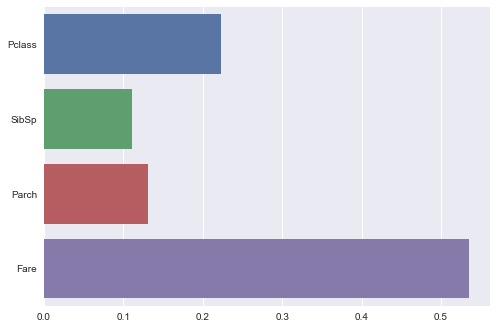

In [12]:
import seaborn as sns
sns.barplot(rf_clf.feature_importances_, numeric_features);

Na real, uma RandomForest é uma combinação de DecisionTreeClassifier. Tá aí a prova:

In [14]:
rf_clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1935803228, splitter='best'),
 DecisionTreeClassifier(class_w

Qual é a vantagem então? Emsembling! Combinar vários modelos diferentes evita overfitting e suaviza os pontos fracos dos modelos individuais.

## Exercício
Você consegue melhorar a acurácia desse modelo? Faça testes usando diferentes valores para max_depth e n_estimators. Se preferir, pode brincar com os outros parâmetros. Qual a melhor acurácia no dataset de validação que você conseguiu?

Pergunta: qual o melhor max_depth e n_estimators que você encontrou? Vamos usá-lo em seguida.

In [26]:
optimal_max_depth = 7 # coloque aqui o max_depth que voce encontrou
optimal_n_estimators = 10 # coloque aqui o n_estimators que voce encontrou

Vamos usar um truquezinho agora. Agora que já tunamos os parâmetros, vamos usar todos os dados pra treinar o modelo. Não faz sentido mais ter separação entre treino e validação.

In [27]:
rf_clf = RandomForestClassifier(random_state=42, max_depth=optimal_max_depth, n_estimators=optimal_n_estimators)
rf_clf.fit(titanic_df[numeric_features].as_matrix(), titanic_df['Survived'].as_matrix())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

Infelizmente no dataset de teste, um dos passageiros está com Fare vazio. :-(

Para conseguirmos evoluir, vamos setar o Fare vazio para 0.0

In [28]:
test_df['Fare'] = test_df['Fare'].fillna(0)

Lembra que o sklean trabalha com matrizes numpy, certo?

In [29]:
test_X = test_df[numeric_features].as_matrix()
print(test_X.shape)

(418, 4)


In [30]:
test_X

array([[  3.    ,   0.    ,   0.    ,   7.8292],
       [  3.    ,   1.    ,   0.    ,   7.    ],
       [  2.    ,   0.    ,   0.    ,   9.6875],
       ..., 
       [  3.    ,   0.    ,   0.    ,   7.25  ],
       [  3.    ,   0.    ,   0.    ,   8.05  ],
       [  3.    ,   1.    ,   1.    ,  22.3583]])

Legal. Temos 418 amostras. Vamos usar o nosso modelo pra prever a sobrevivência dessas 418 pessoas.

In [31]:
y_pred = rf_clf.predict(test_X)

In [32]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

Ótimo! Já temos aquilo que precisávamos. Próximo passo agora é empacotar num arquivo CSV e submeter no Kaggle.

In [33]:
submission_df = pd.DataFrame()

In [34]:
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = y_pred
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


In [35]:
submission_df.to_csv('basic_random_forest.csv', index=False)

Por favor, anote aqui para referência: quanto foi o seu score de treinamento do modelo? E no dataset de Validação? Quanto foi o seu score na submissão do Kaggle?

In [37]:
LB = 0.73684
CV = 0.74301
